In [1]:
import pandas as pd
import numpy as np

In [2]:
# !pip install openpyxl
# !pip install kaggle

In [3]:
# Load all zip code in Los Angeles County
df_LosAngeles= pd.read_csv('Data/Zip_Codes_(LA_County).csv')

df_LosAngeles.head()

,OBJECTID,ZIPCODE,ZIP,TOOLTIP,NLA_URL
0,1,90001,90001,Zip Code: 90001,navigatela/reports/zipcode_county_report.cfm?p...
1,2,90002,90002,Zip Code: 90002,navigatela/reports/zipcode_county_report.cfm?p...
2,3,90003,90003,Zip Code: 90003,navigatela/reports/zipcode_county_report.cfm?p...
3,4,90004,90004,Zip Code: 90004,navigatela/reports/zipcode_county_report.cfm?p...
4,5,90005,90005,Zip Code: 90005,navigatela/reports/zipcode_county_report.cfm?p...


In [4]:
# Get the list of all zip codes in California
zipcodes = list(df_LosAngeles['ZIP'])
len(zipcodes)

311

In [5]:
# # Load the USA real estate data from the Kaggle dataset
# !kaggle datasets download -d ahmedshahriarsakib/usa-real-estate-dataset

In [6]:
# Read the USA real estate data from zip
df_real_estate = pd.read_csv('Data/usa-real-estate-dataset.zip')
df_real_estate.head()

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
0,103378.0,for_sale,105000.0,3.0,2.0,0.12,1962661.0,Adjuntas,Puerto Rico,601.0,920.0,NaN
1,52707.0,for_sale,80000.0,4.0,2.0,0.08,1902874.0,Adjuntas,Puerto Rico,601.0,1527.0,NaN
2,103379.0,for_sale,67000.0,2.0,1.0,0.15,1404990.0,Juana Diaz,Puerto Rico,795.0,748.0,NaN
3,31239.0,for_sale,145000.0,4.0,2.0,0.10,1947675.0,Ponce,Puerto Rico,731.0,1800.0,NaN
4,34632.0,for_sale,65000.0,6.0,2.0,0.05,331151.0,Mayaguez,Puerto Rico,680.0,NaN,NaN


In [7]:
df_real_estate_California = df_real_estate[df_real_estate['zip_code'].isin(zipcodes)]
print(df_real_estate_California.shape)
df_real_estate_California.head()

(45921, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,prev_sold_date
295598,8781.0,for_sale,11500.0,NaN,NaN,1.26,716475.0,Lawndale,North Carolina,90260.0,NaN,NaN
1159604,53016.0,for_sale,225000.0,NaN,NaN,5.25,907302.0,Westcliffe,Colorado,91023.0,NaN,NaN
1256857,109978.0,for_sale,260000.0,3.0,3.0,0.07,1688029.0,Los Angeles,California,90001.0,1574.0,2006-10-06
1256858,104169.0,for_sale,439000.0,2.0,1.0,0.10,306412.0,Los Angeles,California,90001.0,816.0,2011-09-02
1256859,69989.0,for_sale,500000.0,2.0,1.0,0.12,157121.0,Los Angeles,California,90001.0,886.0,NaN


In [8]:
missing_values = df_real_estate_California.isnull().sum()
missing_values = missing_values[missing_values > 0]
missing_values

brokered_by        298
bed               5522
bath              5484
acre_lot          1770
street              38
city                 5
house_size        4287
prev_sold_date    5218
dtype: int64

In [9]:
# drop nan values
df_real_estate_California = df_real_estate_California.dropna()
print(df_real_estate_California.shape)

# drop sold date and keep only the year
df_real_estate_California['prev_sold_date'] = pd.to_datetime(df_real_estate_California['prev_sold_date'])
df_real_estate_California['sold_year'] = df_real_estate_California['prev_sold_date'].dt.year
df_real_estate_California.drop(columns=['prev_sold_date'], inplace=True)
df_real_estate_California.head()

(35755, 12)


,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_year
1256857,109978.0,for_sale,260000.0,3.0,3.0,0.07,1688029.0,Los Angeles,California,90001.0,1574.0,2006
1256858,104169.0,for_sale,439000.0,2.0,1.0,0.10,306412.0,Los Angeles,California,90001.0,816.0,2011
1256862,49425.0,for_sale,490000.0,2.0,1.0,0.07,1614120.0,Los Angeles,California,90001.0,864.0,1981
1256863,80887.0,for_sale,560000.0,3.0,1.0,0.13,1487234.0,Los Angeles,California,90001.0,1679.0,2010
1256865,83394.0,for_sale,515000.0,2.0,1.0,0.11,341198.0,Los Angeles,California,90001.0,720.0,2010


In [10]:
df_real_estate_California.dtypes

brokered_by    float64
status          object
price          float64
bed            float64
bath           float64
acre_lot       float64
street         float64
city            object
state           object
zip_code       float64
house_size     float64
sold_year        int32
dtype: object

In [11]:
city = df_real_estate_California['city'].unique()

In [12]:
unique_values = df_real_estate_California.nunique()
unique_values

brokered_by     4949
status             2
price           3717
bed               49
bath              47
acre_lot         871
street         32778
city             205
state              1
zip_code         288
house_size      5039
sold_year         59
dtype: int64

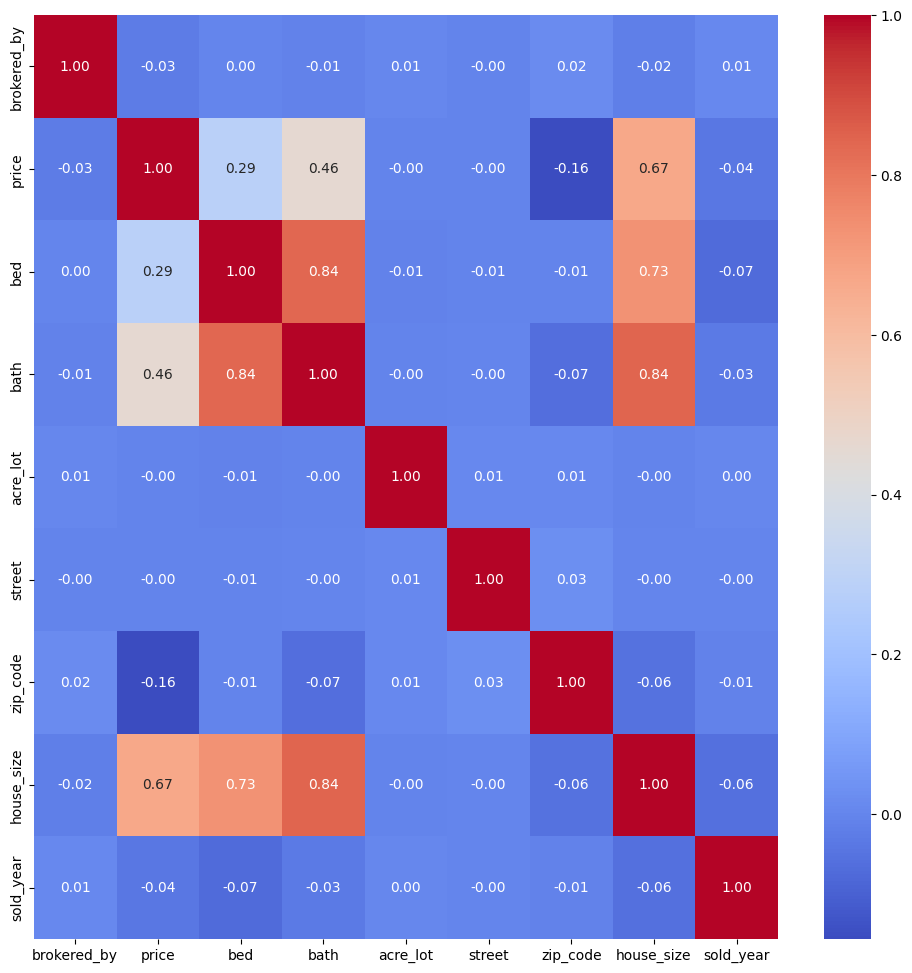

In [13]:
# plot correltion
import seaborn as sns
import matplotlib.pyplot as plt


# include only numerical columns
numerical_df = df_real_estate_California.select_dtypes(include=[np.number])
plt.figure(figsize=(12, 12))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.show()


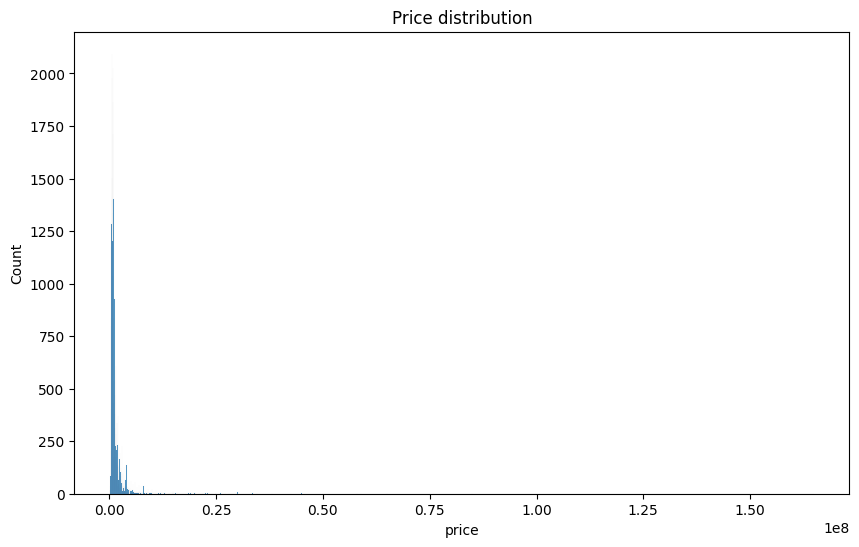

<Figure size 1000x600 with 0 Axes>

In [14]:
# plot the data
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df_real_estate_California['price'])
plt.title('Price distribution')

plt.figure(figsize=(10, 6))
plt.show()

In [15]:
# drop outliers
df_real_estate_California = df_real_estate_California[df_real_estate_California['price'] < 8000000]

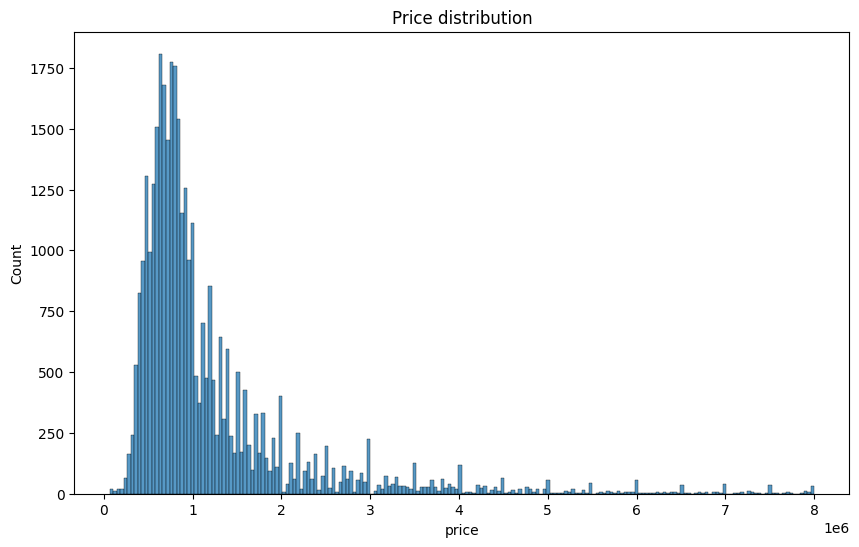

<Figure size 1000x600 with 0 Axes>

In [16]:
plt.figure(figsize=(10, 6))
sns.histplot(df_real_estate_California['price'])
plt.title('Price distribution')

plt.figure(figsize=(10, 6))
plt.show()

In [17]:
df_crime = pd.read_csv('Data/Crime_Data_from_2020_to_Present.csv')
df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,AA,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,IC,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,IC,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,IC,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,IC,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277


In [18]:
#read xls
df_zipcode_area = pd.read_excel('Data/ZIP_Locale_Detail.xls')
df_zipcode_area.head()

# create a dictionary to map zip code to area
zip_area_dict = {}

for index, row in df_zipcode_area.iterrows():
  if row['PHYSICAL STATE'] == 'CA': # only consider California
    if row['LOCALE NAME'] not in zip_area_dict: # for the first time visit the area
      zip_area_dict[row['LOCALE NAME']] = row['PHYSICAL ZIP']
    if row['PHYSICAL DELV ADDR'] not in zip_area_dict: # for the first time visit the address
      zip_area_dict[row['PHYSICAL DELV ADDR']] = row['PHYSICAL ZIP']




In [19]:
zip_area_dict_lower = {k.lower(): v for k, v in zip_area_dict.items()} # convert all keys to lower case

# find zip codes based on area name
# return 0 if not found
def find_zip_codes(area_name):
    area_name_lower = area_name.lower()
    for key, zip_codes in zip_area_dict_lower.items():
        if area_name_lower in key or key in area_name_lower:
            return zip_codes
    return 0
  
# Apply the function to each area name in the DataFrame
df_crime['zip_codes'] = df_crime['AREA NAME'].apply(find_zip_codes)


In [20]:
df_crime.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON,zip_codes
0,190326475,03/01/2020 12:00:00 AM,03/01/2020 12:00:00 AM,2130,7,Wilshire,784,1,510,VEHICLE - STOLEN,...,Adult Arrest,510.0,998.0,NaN,NaN,1900 S LONGWOOD AV,NaN,34.0375,-118.3506,90036
1,200106753,02/09/2020 12:00:00 AM,02/08/2020 12:00:00 AM,1800,1,Central,182,1,330,BURGLARY FROM VEHICLE,...,Invest Cont,330.0,998.0,NaN,NaN,1000 S FLOWER ST,NaN,34.0444,-118.2628,90001
2,200320258,11/11/2020 12:00:00 AM,11/04/2020 12:00:00 AM,1700,3,Southwest,356,1,480,BIKE - STOLEN,...,Invest Cont,480.0,NaN,NaN,NaN,1400 W 37TH ST,NaN,34.0210,-118.3002,0
3,200907217,05/10/2023 12:00:00 AM,03/10/2020 12:00:00 AM,2037,9,Van Nuys,964,1,343,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),...,Invest Cont,343.0,NaN,NaN,NaN,14000 RIVERSIDE DR,NaN,34.1576,-118.4387,91331
4,220614831,08/18/2022 12:00:00 AM,08/17/2020 12:00:00 AM,1200,6,Hollywood,666,2,354,THEFT OF IDENTITY,...,Invest Cont,354.0,NaN,NaN,NaN,1900 TRANSIENT,NaN,34.0944,-118.3277,90028


In [21]:
# filter the data based on the city
df_crime_filtered = df_crime
# drop non useful columns
df_crime_filtered.drop(['DR_NO', 'Date Rptd', 'AREA', 'Crm Cd', 'TIME OCC', 'Rpt Dist No', 'Mocodes', 'Premis Cd', 'Premis Desc', 'Weapon Desc','Weapon Used Cd', 'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'Cross Street', 'LAT', 'LON'], axis=1, inplace=True)

# convert date to datetime
df_crime_filtered['DATE OCC'] = pd.to_datetime(df_crime_filtered['DATE OCC'])
df_crime_filtered['YEAR'] = df_crime_filtered['DATE OCC'].dt.year
df_crime_filtered.drop(['DATE OCC'], axis=1, inplace=True)

# index by year
df_crime_filtered.index = df_crime_filtered['YEAR']
df_crime_filtered.drop(['YEAR'], axis=1, inplace=True)

df_crime_filtered.head()

/var/folders/j0/5bxbmj_d11v9ht5xvzjhn4p00000gn/T/ipykernel_64727/2351435028.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_crime_filtered['DATE OCC'] = pd.to_datetime(df_crime_filtered['DATE OCC'])


,AREA NAME,Part 1-2,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Status,Status Desc,Crm Cd 1,LOCATION,zip_codes
YEAR,,,,,,,,,,,
2020,Wilshire,1,VEHICLE - STOLEN,0,M,O,AA,Adult Arrest,510.0,1900 S LONGWOOD AV,90036
2020,Central,1,BURGLARY FROM VEHICLE,47,M,O,IC,Invest Cont,330.0,1000 S FLOWER ST,90001
2020,Southwest,1,BIKE - STOLEN,19,X,X,IC,Invest Cont,480.0,1400 W 37TH ST,0
2020,Van Nuys,1,SHOPLIFTING-GRAND THEFT ($950.01 & OVER),19,M,O,IC,Invest Cont,343.0,14000 RIVERSIDE DR,91331
2020,Hollywood,2,THEFT OF IDENTITY,28,M,H,IC,Invest Cont,354.0,1900 TRANSIENT,90028


In [22]:
# calculate the crime rate in percentage
crime_rate = df_crime_filtered['zip_codes'].value_counts().groupby(level=0).sum()
crime_rate = crime_rate/df_crime_filtered['zip_codes'].count() * 100
crime_rate_dict = crime_rate.to_dict()
print(crime_rate_dict)
# 0 is the missing zip code

{0: 33.67508111102319, 90001: 6.7548732557832825, 90028: 10.323019704043682, 90036: 4.783730315739495, 90265: 5.826171823481312, 90290: 4.124502123394266, 90710: 4.13832396929651, 91011: 3.33285853710005, 91311: 4.141805808340587, 91331: 4.2730605892748805, 92003: 4.00464245205877, 92113: 5.050776819392788, 95208: 4.555300572393237, 95422: 5.015852918677957}


In [23]:
# crime_range = []
# for key in crime_rate_dict:
#     for i in range(key-3, key+3):
#       crime_range.append(i)
# print(crime_range)

In [24]:
count_in_range = 0
count_out_range = 0

# check how many zip codes are in the crime rate dictionary
for zipcode in df_real_estate_California['zip_code']:
  if zipcode in crime_rate_dict:
    count_in_range += 1
  else:
    count_out_range += 1
    

print(count_in_range)
print(count_out_range)
print(len(df_real_estate_California['zip_code'].unique()) - len(crime_rate_dict))

# calculate the average crime rate for the missing zip codes
crime_rate_dict[0] = crime_rate_dict[0]/(len(df_real_estate_California['zip_code'].unique()) - len(crime_rate_dict) + 1)
print(crime_rate_dict)

1114
34160
274
{0: 0.12245484040372069, 90001: 6.7548732557832825, 90028: 10.323019704043682, 90036: 4.783730315739495, 90265: 5.826171823481312, 90290: 4.124502123394266, 90710: 4.13832396929651, 91011: 3.33285853710005, 91311: 4.141805808340587, 91331: 4.2730605892748805, 92003: 4.00464245205877, 92113: 5.050776819392788, 95208: 4.555300572393237, 95422: 5.015852918677957}


In [25]:
def find_crime_rate(zipcode):
    if zipcode in crime_rate_dict:
        return crime_rate_dict[zipcode]
    return crime_rate_dict[0]
  
# assign the crime rate to the real estate data
df_real_estate_California['crime_rate'] = df_real_estate_California['zip_code'].apply(find_crime_rate)

In [26]:
df_real_estate_California.head(100)

,brokered_by,status,price,bed,bath,acre_lot,street,city,state,zip_code,house_size,sold_year,crime_rate
1256857,109978.0,for_sale,260000.0,3.0,3.0,0.07,1688029.0,Los Angeles,California,90001.0,1574.0,2006,6.754873
1256858,104169.0,for_sale,439000.0,2.0,1.0,0.10,306412.0,Los Angeles,California,90001.0,816.0,2011,6.754873
1256862,49425.0,for_sale,490000.0,2.0,1.0,0.07,1614120.0,Los Angeles,California,90001.0,864.0,1981,6.754873
1256863,80887.0,for_sale,560000.0,3.0,1.0,0.13,1487234.0,Los Angeles,California,90001.0,1679.0,2010,6.754873
1256865,83394.0,for_sale,515000.0,2.0,1.0,0.11,341198.0,Los Angeles,California,90001.0,720.0,2010,6.754873
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257228,109978.0,for_sale,650000.0,2.0,2.0,0.27,54038.0,Los Angeles,California,90006.0,1000.0,2018,0.122455
1257231,29284.0,for_sale,629000.0,2.0,2.0,0.41,946764.0,Los Angeles,California,90006.0,960.0,2016,0.122455
1257232,98034.0,for_sale,1795000.0,10.0,3.0,0.28,310223.0,Los Angeles,California,90006.0,4310.0,1997,0.122455
1257233,37221.0,for_sale,1395000.0,3.0,2.0,0.14,1819082.0,Los Angeles,California,90006.0,1772.0,2017,0.122455


In [27]:
# df_real_estate_LA = df_real_estate_California[df_real_estate_California['zip_code'].isin(crime_rate_dict)]
# len(df_real_estate_LA)
df_real_estate_LA = df_real_estate_California

In [28]:
# save the crime filtered data
df_crime_filtered.to_csv('Data/Crime_Data_from_2020_to_Present_filtered.csv', index=True)
df_real_estate_LA.to_csv('Data/real_estate_LA.csv', index=True)